# Hyperparameter Tuning for ANN-1 Model

This notebook contains the investigation into what architecture is optimal for ANN-1

## Loading of the data

In [1]:
# importing necessary public modules
import numpy as np
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras import Input, Model
import tensorflow as tf

In [2]:
# check to see if GPU is in use
tf.test.gpu_device_name()

'/device:GPU:0'

In [ ]:
# connection to google drive + import data
import os
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
os.chdir("/content/drive/My Drive/content")

# loading of Black-Scholes data
data = np.genfromtxt('bs_data.csv', delimiter=',')

Mounted at /content/drive


## Data Preparation

In [ ]:
# data prep

# inputs: converting spot price + strike price to moneyness (s/k)
inputs = data[:,:5]
X = np.array([np.array([x[0]/x[1], x[2],x[3],x[4]])for x in inputs])

# outputs: scaling the prices byt the strike price (p/k)
y_calls = np.array(data[:,-2]) / data[:,1]
y_puts = np.array(data[:,-1]) / data[:,1]

In [ ]:
# training data
X_train = X[:900000]
y_calls_train = y_calls[:900000]
y_puts_train = y_puts[:900000]

# validation data
X_val = X[900000:950000]
y_calls_val = y_calls[900000:950000]
y_puts_val = y_puts[900000:950000]

# testing data
X_test = X[950000:]
y_calls_test = y_calls[950000:]
y_puts_test = y_puts[950000:]

# shape check
print(X_train.shape)
print(y_calls_train.shape)
print(y_puts_train.shape)
print(X_val.shape)
print(y_calls_val.shape)
print(y_puts_val.shape)
print(X_test.shape)
print(y_calls_test.shape)
print(y_puts_test.shape)

(900000, 4)
(900000,)
(900000,)
(50000, 4)
(50000,)
(50000,)
(50000, 4)
(50000,)
(50000,)


## Initial Comparison of Low-Complexity vs Higher-Complexity

In [ ]:
# higher-complexity model

# 4 layers, 400 neurons per layer (assuming the activation function ReLU w/o dropout)
def build_model():
  inputs = Input(shape=(4,), name='input')
  x = Dense(400, activation='relu', kernel_initializer='glorot_uniform')(inputs)
  x = Dense(400, activation='relu', kernel_initializer='glorot_uniform')(x)
  x = Dense(400, activation='relu', kernel_initializer='glorot_uniform')(x)
  x = Dense(400, activation='relu', kernel_initializer='glorot_uniform')(x)
  call = Dense(1, name='call_output')(x)
  put = Dense(1, name='put_output')(x)

  model = Model(inputs=inputs, outputs=[call, put])
  model.compile(loss='mse', optimizer='adam')

  return model

model = build_model()

history = model.fit(X_train, {'call_output': y_calls_train, 'put_output': y_puts_train}, 
                    validation_data = (X_val, {'call_output': y_calls_val, 'put_output': y_puts_val}),
                    epochs=50, batch_size=200)

Epoch 1/50
4500/4500 [==============================] - 15s 3ms/step - loss: 4.9204e-04 - call_output_loss: 3.8987e-04 - put_output_loss: 1.0217e-04 - val_loss: 4.6652e-06 - val_call_output_loss: 2.9213e-06 - val_put_output_loss: 1.7439e-06
Epoch 2/50
4500/4500 [==============================] - 14s 3ms/step - loss: 2.8946e-05 - call_output_loss: 2.3406e-05 - put_output_loss: 5.5393e-06 - val_loss: 2.1604e-06 - val_call_output_loss: 1.1009e-06 - val_put_output_loss: 1.0594e-06
Epoch 3/50
4500/4500 [==============================] - 16s 4ms/step - loss: 2.2550e-05 - call_output_loss: 1.7940e-05 - put_output_loss: 4.6107e-06 - val_loss: 4.0608e-06 - val_call_output_loss: 2.7709e-06 - val_put_output_loss: 1.2899e-06
Epoch 4/50
4500/4500 [==============================] - 17s 4ms/step - loss: 1.8097e-05 - call_output_loss: 1.4487e-05 - put_output_loss: 3.6094e-06 - val_loss: 2.4792e-06 - val_call_output_loss: 1.4377e-06 - val_put_output_loss: 1.0415e-06
Epoch 5/50
4500/4500 [==============

In [ ]:
# low-complexity model (using Karsoliya's formula)

def build_model2():
  inputs = Input(shape=(4,), name='input')
  x = Dense(5, activation='relu', kernel_initializer='glorot_uniform')(inputs)
  call = Dense(1, name='call_output')(x)
  put = Dense(1, name='put_output')(x)

  model2 = Model(inputs=inputs, outputs=[call, put])
  model2.compile(loss='mse', optimizer='adam')

  return model2

model2 = build_model2()

history2 = model2.fit(X_train, {'call_output': y_calls_train, 'put_output': y_puts_train},
                      validation_data = (X_val, {'call_output': y_calls_val, 'put_output': y_puts_val}),
                      epochs=50, batch_size=200)

Epoch 1/50
4500/4500 [==============================] - 12s 2ms/step - loss: 0.1069 - call_output_loss: 0.0187 - put_output_loss: 0.0882 - val_loss: 0.0051 - val_call_output_loss: 0.0024 - val_put_output_loss: 0.0027
Epoch 2/50
4500/4500 [==============================] - 11s 2ms/step - loss: 0.0024 - call_output_loss: 0.0012 - put_output_loss: 0.0013 - val_loss: 0.0017 - val_call_output_loss: 8.5987e-04 - val_put_output_loss: 8.6239e-04
Epoch 3/50
4500/4500 [==============================] - 11s 2ms/step - loss: 0.0017 - call_output_loss: 8.5542e-04 - put_output_loss: 8.6128e-04 - val_loss: 0.0017 - val_call_output_loss: 8.6284e-04 - val_put_output_loss: 8.6481e-04
Epoch 4/50
4500/4500 [==============================] - 11s 2ms/step - loss: 0.0017 - call_output_loss: 8.5517e-04 - put_output_loss: 8.6260e-04 - val_loss: 0.0017 - val_call_output_loss: 8.8025e-04 - val_put_output_loss: 8.6966e-04
Epoch 5/50
4500/4500 [==============================] - 11s 2ms/step - loss: 0.0017 - call_o

In [ ]:
# low-complexity model (using Sheela et al. formula)

# 1 layer, 5 neurons (assuming the activation function ReLU w/o dropout)
def build_model3():
  inputs = Input(shape=(4,), name='input')
  x = Dense(8, activation='relu', kernel_initializer='glorot_uniform')(inputs)
  x = Dense(8, activation='relu', kernel_initializer='glorot_uniform')(inputs)
  call = Dense(1, name='call_output')(x)
  put = Dense(1, name='put_output')(x)

  model3 = Model(inputs=inputs, outputs=[call, put])
  model3.compile(loss='mse', optimizer='adam')

  return model3

model3 = build_model3()

history3 = model3.fit(X_train, {'call_output': y_calls_train, 'put_output': y_puts_train}, 
                      validation_data = (X_val, {'call_output': y_calls_val, 'put_output': y_puts_val}),
                      epochs=50, batch_size=200)

Epoch 1/50
4500/4500 [==============================] - 12s 2ms/step - loss: 0.0122 - call_output_loss: 0.0090 - put_output_loss: 0.0033 - val_loss: 0.0017 - val_call_output_loss: 8.7509e-04 - val_put_output_loss: 8.7110e-04
Epoch 2/50
4500/4500 [==============================] - 11s 3ms/step - loss: 0.0017 - call_output_loss: 8.6058e-04 - put_output_loss: 8.6273e-04 - val_loss: 0.0017 - val_call_output_loss: 8.6081e-04 - val_put_output_loss: 8.6227e-04
Epoch 3/50
4500/4500 [==============================] - 11s 2ms/step - loss: 0.0017 - call_output_loss: 8.5848e-04 - put_output_loss: 8.6128e-04 - val_loss: 0.0017 - val_call_output_loss: 8.7317e-04 - val_put_output_loss: 8.6788e-04
Epoch 4/50
4500/4500 [==============================] - 11s 2ms/step - loss: 0.0017 - call_output_loss: 8.5855e-04 - put_output_loss: 8.6182e-04 - val_loss: 0.0017 - val_call_output_loss: 8.6232e-04 - val_put_output_loss: 8.6656e-04
Epoch 5/50
4500/4500 [==============================] - 11s 2ms/step - loss:

It is evident that the models proposed with low-complexity were incapable of providing high enough accuracy (they never reached a loss below 1e-05)

## Finding the Optimal Number of Layers and Neurons

In [ ]:
# Grid Search for best model 

# function to build models
def build_model(num_of_nodes, num_of_layers):
  inputs = Input(shape=(4,), name='input')

  x = inputs
  for i in range(num_of_layers):
    x = Dense(num_of_nodes, activation='relu', kernel_initializer='glorot_uniform')(x)

  call = Dense(1, name='call_output')(x)
  put = Dense(1, name='put_output')(x)

  model = Model(inputs=inputs, outputs=[call, put])
  model.compile(loss='mse', optimizer='adam')

  return model

# loop over number of layers (1-8)
for i in range(8):
  # loop over number of nodes (100-800)
  for j in range(100,900,100):
    sum_of_losses = 0
    name = 'Layers' + str(i+1) + 'Nodes' + str(j)
    model_infra = name
    # 2 models to get an average MSE
    for iteration in range(2):
      print('\n')
      print('Iteration: ' + str(iteration+1) + ' for ' + str(model_infra))
      model = model_infra + str(iteration+1)
      model = build_model(j, i+1)
      model.fit(X_train, {'call_output': y_calls_train, 'put_output': y_puts_train},
                validation_data = (X_val, {'call_output': y_calls_val, 'put_output': y_puts_val}),
                epochs=20, batch_size=200)
      mse_loss = model.evaluate(X_val, [y_calls_val, y_puts_val])[0]
      sum_of_losses += mse_loss
    
    # mean mse for the model
    mean_mse = sum_of_losses / 2

    print('\n')
    print('Model: ' + str(model_infra))
    print('Mean Loss over 2 models: ' + str(mean_mse))
    print('\n')

Streaming output truncated to the last 5000 lines.
4500/4500 [==============================] - 16s 4ms/step - loss: 2.9988e-06 - call_output_loss: 2.2290e-06 - put_output_loss: 7.6980e-07 - val_loss: 1.4290e-06 - val_call_output_loss: 7.5559e-07 - val_put_output_loss: 6.7341e-07
Epoch 16/20
4500/4500 [==============================] - 16s 3ms/step - loss: 3.3120e-06 - call_output_loss: 2.4657e-06 - put_output_loss: 8.4636e-07 - val_loss: 6.7979e-06 - val_call_output_loss: 5.5067e-06 - val_put_output_loss: 1.2912e-06
Epoch 17/20
4500/4500 [==============================] - 16s 4ms/step - loss: 3.2058e-06 - call_output_loss: 2.4320e-06 - put_output_loss: 7.7378e-07 - val_loss: 5.0468e-07 - val_call_output_loss: 1.3465e-07 - val_put_output_loss: 3.7003e-07
Epoch 18/20
4500/4500 [==============================] - 16s 4ms/step - loss: 2.8836e-06 - call_output_loss: 2.1303e-06 - put_output_loss: 7.5327e-07 - val_loss: 3.2539e-07 - val_call_output_loss: 1.7097e-07 - val_put_output_loss: 1.54

In [ ]:
# dataframe of mean loss for layer and neuron combinations
import pandas as pd

layer1_list = [7.359e-06, 6.289e-06, 4.070e-06, 2.003e-06, 1.746e-06, 1.047e-06, 7.583e-06, 5.471e-06]
layer2_list = [4.557e-06, 6.970e-06, 8.518e-06, 2.262e-06, 2.963e-06, 1.590e-06, 6.889e-07, 5.947e-07]
layer3_list = [1.005e-06, 4.908e-06, 7.105e-07, 8.215e-07, 6.115e-06, 4.318e-06, 2.166e-06, 5.741e-07]
layer4_list = [1.216e-06, 4.935e-07, 4.920e-07, 1.159e-06, 6.035e-07, 4.393e-07, 7.292e-07, 4.760e-07]
layer5_list = [5.833e-06, 8.044e-07, 1.644e-06, 5.281e-07, 1.038e-06, 7.464e-06, 3.804e-05, 5.788e-07]
layer6_list = [2.355e-06, 3.905e-05, 9.789e-07, 2.571e-06, 6.120e-07, 1.366e-06, 2.671e-05, 1.479e-06]
layer7_list = [1.091e-05, 1.257e-05, 2.031e-06, 1.331e-06, 1.392e-05, 5.425e-06, 8.993e-07, 1.368e-06]
layer8_list = [9.106e-07, 1.398e-06, 8.125e-07, 1.966e-06, 4.446e-05, 1.794e-06, 8.472e-07, 1.302e-06]

df_input = [layer1_list, layer2_list, layer3_list, layer4_list,
            layer5_list, layer6_list, layer7_list, layer8_list]
df_index = ['1 Layer', '2 Layers', '3 Layers', '4 Layers', '5 Layers', '6 Layers', '7 Layers', '8 Layers']
columns= ['100 Neurons', '200 Neurons','300 Neurons','400 Neurons',
          '500 Neurons','600 Neurons','700 Neurons','800 Neurons']

df = pd.DataFrame(df_input, columns=columns,
                  index = df_index)
display(df)

,100 Neurons,200 Neurons,300 Neurons,400 Neurons,500 Neurons,600 Neurons,700 Neurons,800 Neurons
1 Layer,7.359000e-06,6.289000e-06,4.070000e-06,2.003000e-06,1.746000e-06,1.047000e-06,7.583000e-06,5.471000e-06
2 Layers,4.557000e-06,6.970000e-06,8.518000e-06,2.262000e-06,2.963000e-06,1.590000e-06,6.889000e-07,5.947000e-07
3 Layers,1.005000e-06,4.908000e-06,7.105000e-07,8.215000e-07,6.115000e-06,4.318000e-06,2.166000e-06,5.741000e-07
4 Layers,1.216000e-06,4.935000e-07,4.920000e-07,1.159000e-06,6.035000e-07,4.393000e-07,7.292000e-07,4.760000e-07
5 Layers,5.833000e-06,8.044000e-07,1.644000e-06,5.281000e-07,1.038000e-06,7.464000e-06,3.804000e-05,5.788000e-07
6 Layers,2.355000e-06,3.905000e-05,9.789000e-07,2.571000e-06,6.120000e-07,1.366000e-06,2.671000e-05,1.479000e-06
7 Layers,1.091000e-05,1.257000e-05,2.031000e-06,1.331000e-06,1.392000e-05,5.425000e-06,8.993000e-07,1.368000e-06
8 Layers,9.106000e-07,1.398000e-06,8.125000e-07,1.966000e-06,4.446000e-05,1.794000e-06,8.472000e-07,1.302000e-06


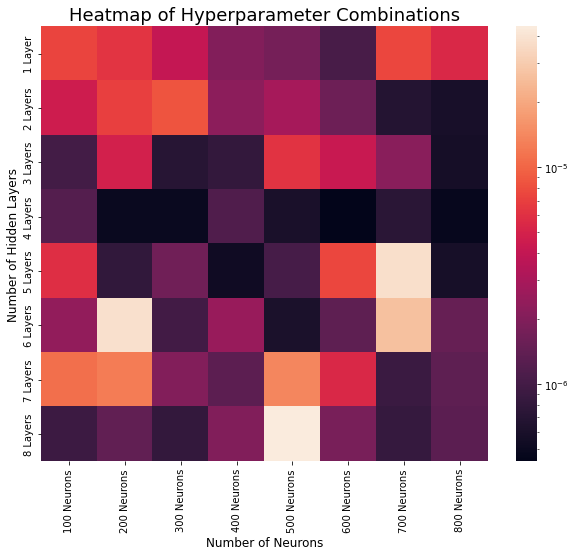

In [ ]:
# heatmap of layer and neuron combinations

import seaborn as sns
from matplotlib.colors import LogNorm
import matplotlib.pyplot as plt

plt.figure(figsize = (10,8))

# as the values are extremely small, we have to scale them so they are more comparable visually
df2 = np.asarray(df_input)
log_norm = LogNorm(vmin=df2.min().min(), vmax=df2.max().max())

ax = sns.heatmap(df2,
                  norm=log_norm,
                  yticklabels=df_index,
                 xticklabels = columns
                 )

plt.title('Heatmap of Hyperparameter Combinations', fontsize=18)
plt.xlabel('Number of Neurons', fontsize=12)
plt.ylabel('Number of Hidden Layers', fontsize=12)
plt.show()

A model with 4 hidden layers is where we see the lowest consistent MSE values of below 1e-06. Although the loss is minimised with 600 neurons, we will assume 300 neurons achieves the same accuracy as the difference in loss is minimal and we want to minimise the number of neurons

## Finding Best Optimization Algorithm and Learning Rate

In [ ]:
# Grid Search for best learning algorithm and learning rate

# function to build model based on optimizer and lr
def optimization_tester(optimizer, learning_rate):
  inputs = Input(shape=(4,), name='input')

  x = inputs
  for i in range(4):
    x = Dense(300, activation='relu', kernel_initializer='glorot_uniform')(x)

  call = Dense(1, name='call_output')(x)
  put = Dense(1, name='put_output')(x)

  if optimizer == 'adam':
    opt = tf.keras.optimizers.Adam(learning_rate=learning_rate)
  else:
    opt = tf.keras.optimizers.SGD(learning_rate = learning_rate)

  model = Model(inputs=inputs, outputs=[call, put])
  model.compile(loss='mse', optimizer=opt)

  return model

optimizer_list = ['sgd', 'adam']
learning_rate = [1e-2, 1e-3, 1e-4, 1e-5]

dict_to_hold_loss = {}

# loop over optimizers
for i in optimizer_list:
  # loop over learning rates
  for j in learning_rate:
    sum_of_losses = 0
    name = 'Optimizer: ' + i + ' + ' + ' Learning Rate: ' + str(j)
    model_infra = name
    # 2 models to get an average MSE
    for iteration in range(2):
      print('\n')
      print('Iteration: ' + str(iteration+1) + ' for ' + str(model_infra))
      model = model_infra + str(iteration+1)
      model = optimization_tester(i,j)
      model.fit(X_train, {'call_output': y_calls_train, 'put_output': y_puts_train},
                validation_data = (X_val, {'call_output': y_calls_val, 'put_output': y_puts_val}),
                epochs=20, batch_size=200)
      mse_loss = model.evaluate(X_val, [y_calls_val, y_puts_val])[0]
      sum_of_losses += mse_loss
    
    # mean mse for the model
    mean_mse = sum_of_losses / 2
    dict_to_hold_loss[model_infra] = mean_mse

    print('\n')
    print('Model: ' + str(model_infra))
    print('Mean Loss over 2 models: ' + str(mean_mse))
    print('\n')

best_params = min(dict_to_hold_loss, key=dict_to_hold_loss.get)
loss_value = dict_to_hold_loss[best_params]
print('Lowest loss achieved with ' + best_params + ', with an average MSE of ' + str(loss_value))



Iteration: 1 for Optimizer: sgd +  Learning Rate: 0.01
Epoch 1/20
4500/4500 [==============================] - 16s 3ms/step - loss: 0.0062 - call_output_loss: 0.0039 - put_output_loss: 0.0023 - val_loss: 0.0010 - val_call_output_loss: 3.7356e-04 - val_put_output_loss: 6.5548e-04
Epoch 2/20
4500/4500 [==============================] - 15s 3ms/step - loss: 6.3739e-04 - call_output_loss: 2.3688e-04 - put_output_loss: 4.0050e-04 - val_loss: 3.9318e-04 - val_call_output_loss: 1.5311e-04 - val_put_output_loss: 2.4007e-04
Epoch 3/20
4500/4500 [==============================] - 15s 3ms/step - loss: 2.9354e-04 - call_output_loss: 1.1695e-04 - put_output_loss: 1.7659e-04 - val_loss: 2.1774e-04 - val_call_output_loss: 9.0068e-05 - val_put_output_loss: 1.2767e-04
Epoch 4/20
4500/4500 [==============================] - 15s 3ms/step - loss: 1.7925e-04 - call_output_loss: 7.5463e-05 - put_output_loss: 1.0379e-04 - val_loss: 1.4602e-04 - val_call_output_loss: 6.3410e-05 - val_put_output_loss: 8.2606

Using the Adam optimizer with a learning rate of 1e-05 provides the lowest loss.

## Final Model Design

In [4]:
inputs = Input(shape=(4,), name='input')
x = Dense(300, activation='relu', kernel_initializer='glorot_uniform')(inputs)
x = Dense(300, activation='relu', kernel_initializer='glorot_uniform')(x)
x = Dense(300, activation='relu', kernel_initializer='glorot_uniform')(x)
x = Dense(300, activation='relu', kernel_initializer='glorot_uniform')(x)
call = Dense(1, name='call_output')(x)
put = Dense(1, name='put_output')(x)

model = Model(inputs=inputs, outputs=[call, put])

opt = tf.keras.optimizers.Adam(learning_rate=1e-05)
model.compile(loss='mse', optimizer=opt)

model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input (InputLayer)             [(None, 4)]          0           []                               
                                                                                                  
 dense_4 (Dense)                (None, 300)          1500        ['input[0][0]']                  
                                                                                                  
 dense_5 (Dense)                (None, 300)          90300       ['dense_4[0][0]']                
                                                                                                  
 dense_6 (Dense)                (None, 300)          90300       ['dense_5[0][0]']                
                                                                                            